In [80]:
import init
import pandas as pd
import import_ipynb
import fantasy_functions as ff
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

## Load Initial Play-By-Play Data

In [2]:
filepath = '~/Desktop/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_2019_4.csv'

In [3]:
initial_df = pd.read_csv(filepath)

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
initial_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

## Get RBs List- This will come into play as we evaluate the plays

In [5]:
roster_filepath = '~/Desktop/nflscrapR-data/roster_data/regular_season/reg_roster_2019.csv'

In [6]:
rb_names_df = ff.player_names(roster_filepath, 'RB')

In [7]:
rb_names_df.head()

,abbr_player_name,gsis_id
0,A.Jones,00-0033293
1,A.Peterson,00-0025394
2,A.Mattison,00-0034972
3,A.Kamara,00-0033906
4,A.Abdullah,00-0032104


In [9]:
remove_no_plays_df = initial_df[initial_df.play_type != 'no_play']

## Filter to plays that only involve the Running Backs in the List

In [10]:
rb_plays = ff.filter_position(rb_names_df, remove_no_plays_df)

In [11]:
rb_plays.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [15]:
rb_plays[rb_plays['play_type'] == 'run']['run_gap'].value_counts()

left      3567
right     3514
middle    2773
Name: run_location, dtype: int64

In [64]:
def rb_run_breakdowns(rb_plays, rb_names_df): 
    rbs_df = {}
    for rb in range(len(rb_names_df['gsis_id'])):
#         print(rb_names_df)
        rb_spec = rb_plays[(rb_plays['play_type'] == 'run') \
                           & (rb_plays['rusher_player_id'] == rb_names_df['gsis_id'][rb])]
        rb_df = rb_spec[['play_id','desc', 'home_team', 'defteam', 'side_of_field', 'yardline_100', \
                    'game_date', 'quarter_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'qtr', 'down', \
                    'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'play_type', 'yards_gained', 'shotgun', \
                    'no_huddle', 'run_location', 'run_gap', 'posteam_score', 'defteam_score', 'score_differential', \
                    'epa', 'wp', 'first_down_rush', 'third_down_converted', 'third_down_failed', \
                    'fourth_down_converted', 'fourth_down_failed', 'fumble', 'fumble_forced', 'fumble_not_forced', \
                    'fumble_out_of_bounds', 'solo_tackle', 'safety', 'penalty', 'tackled_for_loss', \
                    'fumble_lost', 'rush_attempt', 'lateral_rush', 'passer_player_name', 'rusher_player_id', \
                    'rusher_player_name', 'blocked_player_name', 'tackle_for_loss_1_player_name', \
                    'tackle_for_loss_2_player_name', 'forced_fumble_player_1_team', \
                    'forced_fumble_player_1_player_name', 'forced_fumble_player_1_player_id', 'forced_fumble_player_2_team', \
                    'forced_fumble_player_2_player_name', 'forced_fumble_player_2_player_id', 'solo_tackle_1_team', 
                    'solo_tackle_2_team', 'solo_tackle_1_player_id', 'solo_tackle_2_player_id', 'solo_tackle_1_player_name', 
                    'solo_tackle_2_player_name', 'fumbled_2_player_id', 'fumbled_2_player_name', 'fumble_recovery_1_team', \
                    'fumble_recovery_1_player_name', 'fumble_recovery_1_player_id', 'penalty_player_id', 'penalty_player_name', \
                    'penalty_yards', 'penalty_type']]
        rbs_df[rb_names_df['abbr_player_name'][rb]] = rb_df
    return rbs_df

In [65]:
rb_dict = rb_run_breakdowns(rb_plays, rb_names_df)

In [87]:
rb_dict['D.Singletary'].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt'].sum().reset_index()

,run_location,run_gap,rush_attempt
0,left,end,11.0
1,left,guard,29.0
2,left,tackle,29.0
3,right,end,3.0
4,right,guard,24.0
5,right,tackle,22.0


In [91]:
rush_sum = rb_dict['D.Singletary'].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt'].sum().reset_index()['rush_attempt'].sum()

In [92]:
rush_sum

118.0

In [120]:
# Create RB Dictionary, then use first initial + last name to get resulting plot
def rb_gap_pct(rb_dict, rb_name):
    rush_sum = rb_dict[rb_name].groupby(['run_location', 'run_gap'])\
        ['run_location', 'run_gap', 'rush_attempt'].sum().reset_index()['rush_attempt'].sum()
    left_end = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][0] / rush_sum * 100
    left_tackle = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][2] / rush_sum * 100
    left_guard = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][1] / rush_sum * 100
    right_guard = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][4] / rush_sum * 100
    right_tackle = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][5] / rush_sum * 100
    right_end = rb_dict[rb_name].groupby(['run_location', 'run_gap'])['run_location', 'run_gap', 'rush_attempt']\
        .sum().reset_index()['rush_attempt'][3] / rush_sum * 100
    locations = ['', 'Left Tackle', 'Left Guard', 'Center', 'Right Guard', 'Right Tackle']
    y_pos = np.arange(len(locations))
    values = [left_end, left_tackle, left_guard, right_guard, right_tackle, right_end]
    plt.bar(y_pos, values, align='edge', alpha=0.5)
    plt.xticks(y_pos, locations, rotation = 90)
    # plt.yticks([0, .2, .4, .6, .8, 1])
    plt.xlabel('Gap')
    plt.ylabel('Location Percentage')
    plt.title(f'{rb_name} Rush Percentage by Gap')
    plt.tight_layout()
    plt.show()

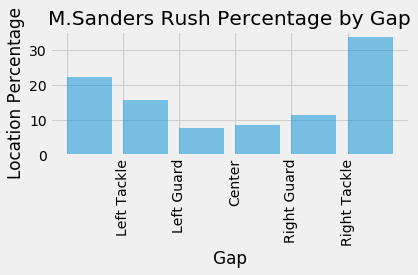

In [136]:
rb_gap_pct(rb_dict, 'M.Sanders')